In [1]:
pip install scipy

    100% |████████████████████████████████| 33.0MB 339kB/s ta 0:00:011  4% |█▎                              | 1.4MB 3.0MB/s eta 0:00:11    17% |█████▊                          | 5.9MB 14.6MB/s eta 0:00:02    39% |████████████▋                   | 12.9MB 1.8MB/s eta 0:00:12    45% |██████████████▊                 | 15.1MB 10.5MB/s eta 0:00:02    84% |███████████████████████████     | 27.8MB 5.7MB/s eta 0:00:01
You are using pip version 19.0.3, however version 23.0 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [25]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
from IPython.display import display
import numpy as np

# Study data files
ZHVI_path = "Resources/ZHVI-CityData.csv"
ZHVI_df = pd.read_csv(ZHVI_path)
ZHVI_df = ZHVI_df.iloc[1:]
ZHVI_df.head()

,RegionID,SizeRank,RegionName,RegionType,StateName,State,Metro,CountyName,1/31/00,2/29/00,3/31/00,4/30/00,5/31/00,6/30/00,7/31/00,8/31/00,9/30/00,10/31/00,11/30/00,12/31/00,1/31/01,2/28/01,3/31/01,4/30/01,5/31/01,6/30/01,7/31/01,8/31/01,9/30/01,10/31/01,11/30/01,12/31/01,1/31/02,2/28/02,3/31/02,4/30/02,5/31/02,6/30/02,7/31/02,8/31/02,9/30/02,10/31/02,11/30/02,12/31/02,1/31/03,2/28/03,3/31/03,4/30/03,5/31/03,6/30/03,7/31/03,8/31/03,9/30/03,10/31/03,11/30/03,12/31/03,1/31/04,2/29/04,3/31/04,4/30/04,5/31/04,6/30/04,7/31/04,8/31/04,9/30/04,10/31/04,11/30/04,12/31/04,1/31/05,2/28/05,3/31/05,4/30/05,5/31/05,6/30/05,7/31/05,8/31/05,9/30/05,10/31/05,11/30/05,12/31/05,1/31/06,2/28/06,3/31/06,4/30/06,5/31/06,6/30/06,7/31/06,8/31/06,9/30/06,10/31/06,11/30/06,12/31/06,1/31/07,2/28/07,3/31/07,4/30/07,5/31/07,6/30/07,7/31/07,8/31/07,9/30/07,10/31/07,11/30/07,12/31/07,1/31/08,2/29/08,3/31/08,4/30/08,5/31/08,6/30/08,7/31/08,8/31/08,9/30/08,10/31/08,11/30/08,12/31/08,1/31/09,2/28/09,3/31/09,4/30/09,5/31/09,6/30/09,7/31/09,8/31/09,9/30/09,10/31/09,11/30/09,12/31/09,1/31/10,2/28/10,3/31/10,4/30/10,5/31/10,6/30/10,7/31/10,8/31/10,9/30/10,10/31/10,11/30/10,12/31/10,1/31/11,2/28/11,3/31/11,4/30/11,5/31/11,6/30/11,7/31/11,8/31/11,9/30/11,10/31/11,11/30/11,12/31/11,1/31/12,2/29/12,3/31/12,4/30/12,5/31/12,6/30/12,7/31/12,8/31/12,9/30/12,10/31/12,11/30/12,12/31/12,1/31/13,2/28/13,3/31/13,4/30/13,5/31/13,6/30/13,7/31/13,8/31/13,9/30/13,10/31/13,11/30/13,12/31/13,1/31/14,2/28/14,3/31/14,4/30/14,5/31/14,6/30/14,7/31/14,8/31/14,9/30/14,10/31/14,11/30/14,12/31/14,1/31/15,2/28/15,3/31/15,4/30/15,5/31/15,6/30/15,7/31/15,8/31/15,9/30/15,10/31/15,11/30/15,12/31/15,1/31/16,2/29/16,3/31/16,4/30/16,5/31/16,6/30/16,7/31/16,8/31/16,9/30/16,10/31/16,11/30/16,12/31/16,1/31/17,2/28/17,3/31/17,4/30/17,5/31/17,6/30/17,7/31/17,8/31/17,9/30/17,10/31/17,11/30/17,12/31/17,1/31/18,2/28/18,3/31/18,4/30/18,5/31/18,6/30/18,7/31/18,8/31/18,9/30/18,10/31/18,11/30/18,12/31/18,1/31/19,2/28/19,3/31/19,4/30/19,5/31/19,6/30/19,7/31/19,8/31/19,9/30/19,10/31/19,11/30/19,12/31/19,1/31/20,2/29/20,3/31/20,4/30/20,5/31/20,6/30/20,7/31/20,8/31/20,9/30/20,10/31/20,11/30/20,12/31/20,1/31/21,2/28/21,3/31/21,4/30/21,5/31/21,6/30/21,7/31/21,8/31/21,9/30/21,10/31/21,11/30/21,12/31/21,1/31/22,2/28/22,3/31/22,4/30/22,5/31/22,6/30/22,7/31/22,8/31/22,9/30/22,10/31/22,11/30/22,12/31/22
1,12447,1,Los Angeles,city,CA,CA,"Los Angeles-Long Beach-Anaheim, CA",Los Angeles County,235321.0,235542.0,236660.0,238746.0,241282.0,243602.0,245996.0,248684.0,251201.0,253272.0,255292.0,257306.0,258805.0,260219.0,262011.0,264616.0,267172.0,269683.0,272305.0,275131.0,277673.0,280363.0,282813.0,285481.0,287503.0,289799.0,292660.0,296438.0,300654.0,304795.0,310110.0,315716.0,321721.0,327042.0,332420.0,337584.0,341737.0,345390.0,349776.0,354295.0,360055.0,364488.0,371119.0,377963.0,385741.0,391513.0,397246.0,403359.0,410725.0,418118.0,425761.0,435371.0,447326.0,458987.0,469294.0,478681.0,489937.0,500719.0,508074.0,514311.0,519101.0,527337.0,534960.0,543534.0,550544.0,559188.0,568849.0,579462.0,589900.0,601708.0,609999.0,617221.0,623528.0,629165.0,635369.0,639435.0,645716.0,650399.0,653373.0,655142.0,652977.0,652426.0,652222.0,654424.0,655255.0,655138.0,653597.0,653150.0,650465.0,647697.0,642300.0,636869.0,630895.0,623627.0,617162.0,610342.0,605965.0,599540.0,588918.0,574006.0,557289.0,542249.0,526772.0,513006.0,502558.0,493369.0,484251.0,471579.0,463012.0,457412.0,454819.0,451244.0,447707.0,442355.0,438278.0,435928.0,435471.0,435631.0,437432.0,442132.0,444042.0,443247.0,444058.0,446311.0,450640.0,448736.0,446329.0,440751.0,435908.0,431057.0,426803.0,425790.0,425089.0,425841.0,424073.0,422803.0,417911.0,417207.0,415698.0,412970.0,407775.0,402797.0,402156.0,402000.0,401939.0,401859.0,401600.0,402420.0,403637.0,406011.0,408737.0,410437.0,412225.0,416062.0,420738.0,428250.0,434192.0,443588.0,452734.0,463590.0,472375.0,481543.0,490452.0,500489.0,508358.0,514084.0,519412.0,523519.0,529383.0,531647.0,534144.0,533705.0,535258.0,536

In [2]:
pd.options.display.max_columns = None
display(ZHVI_df)

,RegionID,SizeRank,RegionName,RegionType,StateName,State,Metro,CountyName,1/31/00,2/29/00,3/31/00,4/30/00,5/31/00,6/30/00,7/31/00,8/31/00,9/30/00,10/31/00,11/30/00,12/31/00,1/31/01,2/28/01,3/31/01,4/30/01,5/31/01,6/30/01,7/31/01,8/31/01,9/30/01,10/31/01,11/30/01,12/31/01,1/31/02,2/28/02,3/31/02,4/30/02,5/31/02,6/30/02,7/31/02,8/31/02,9/30/02,10/31/02,11/30/02,12/31/02,1/31/03,2/28/03,3/31/03,4/30/03,5/31/03,6/30/03,7/31/03,8/31/03,9/30/03,10/31/03,11/30/03,12/31/03,1/31/04,2/29/04,3/31/04,4/30/04,5/31/04,6/30/04,7/31/04,8/31/04,9/30/04,10/31/04,11/30/04,12/31/04,1/31/05,2/28/05,3/31/05,4/30/05,5/31/05,6/30/05,7/31/05,8/31/05,9/30/05,10/31/05,11/30/05,12/31/05,1/31/06,2/28/06,3/31/06,4/30/06,5/31/06,6/30/06,7/31/06,8/31/06,9/30/06,10/31/06,11/30/06,12/31/06,1/31/07,2/28/07,3/31/07,4/30/07,5/31/07,6/30/07,7/31/07,8/31/07,9/30/07,10/31/07,11/30/07,12/31/07,1/31/08,2/29/08,3/31/08,4/30/08,5/31/08,6/30/08,7/31/08,8/31/08,9/30/08,10/31/08,11/30/08,12/31/08,1/31/09,2/28/09,3/31/09,4/30/09,5/31/09,6/30/09,7/31/09,8/31/09,9/30/09,10/31/09,11/30/09,12/31/09,1/31/10,2/28/10,3/31/10,4/30/10,5/31/10,6/30/10,7/31/10,8/31/10,9/30/10,10/31/10,11/30/10,12/31/10,1/31/11,2/28/11,3/31/11,4/30/11,5/31/11,6/30/11,7/31/11,8/31/11,9/30/11,10/31/11,11/30/11,12/31/11,1/31/12,2/29/12,3/31/12,4/30/12,5/31/12,6/30/12,7/31/12,8/31/12,9/30/12,10/31/12,11/30/12,12/31/12,1/31/13,2/28/13,3/31/13,4/30/13,5/31/13,6/30/13,7/31/13,8/31/13,9/30/13,10/31/13,11/30/13,12/31/13,1/31/14,2/28/14,3/31/14,4/30/14,5/31/14,6/30/14,7/31/14,8/31/14,9/30/14,10/31/14,11/30/14,12/31/14,1/31/15,2/28/15,3/31/15,4/30/15,5/31/15,6/30/15,7/31/15,8/31/15,9/30/15,10/31/15,11/30/15,12/31/15,1/31/16,2/29/16,3/31/16,4/30/16,5/31/16,6/30/16,7/31/16,8/31/16,9/30/16,10/31/16,11/30/16,12/31/16,1/31/17,2/28/17,3/31/17,4/30/17,5/31/17,6/30/17,7/31/17,8/31/17,9/30/17,10/31/17,11/30/17,12/31/17,1/31/18,2/28/18,3/31/18,4/30/18,5/31/18,6/30/18,7/31/18,8/31/18,9/30/18,10/31/18,11/30/18,12/31/18,1/31/19,2/28/19,3/31/19,4/30/19,5/31/19,6/30/19,7/31/19,8/31/19,9/30/19,10/31/19,11/30/19,12/31/19,1/31/20,2/29/20,3/31/20,4/30/20,5/31/20,6/30/20,7/31/20,8/31/20,9/30/20,10/31/20,11/30/20,12/31/20,1/31/21,2/28/21,3/31/21,4/30/21,5/31/21,6/30/21,7/31/21,8/31/21,9/30/21,10/31/21,11/30/21,12/31/21,1/31/22,2/28/22,3/31/22,4/30/22,5/31/22,6/30/22,7/31/22,8/31/22,9/30/22,10/31/22,11/30/22,12/31/22
1,12447,1,Los Angeles,city,CA,CA,"Los Angeles-Long Beach-Anaheim, CA",Los Angeles County,235321.0,235542.0,236660.0,238746.0,241282.0,243602.0,245996.0,248684.0,251201.0,253272.0,255292.0,257306.0,258805.0,260219.0,262011.0,264616.0,267172.0,269683.0,272305.0,275131.0,277673.0,280363.0,282813.0,285481.0,287503.0,289799.0,292660.0,296438.0,300654.0,304795.0,310110.0,315716.0,321721.0,327042.0,332420.0,337584.0,341737.0,345390.0,349776.0,354295.0,360055.0,364488.0,371119.0,377963.0,385741.0,391513.0,397246.0,403359.0,410725.0,418118.0,425761.0,435371.0,447326.0,458987.0,469294.0,478681.0,489937.0,500719.0,508074.0,514311.0,519101.0,527337.0,534960.0,543534.0,550544.0,559188.0,568849.0,579462.0,589900.0,601708.0,609999.0,617221.0,623528.0,629165.0,635369.0,639435.0,645716.0,650399.0,653373.0,655142.0,652977.0,652426.0,652222.0,654424.0,655255.0,655138.0,653597.0,653150.0,650465.0,647697.0,642300.0,636869.0,630895.0,623627.0,617162.0,610342.0,605965.0,599540.0,588918.0,574006.0,557289.0,542249.0,526772.0,513006.0,502558.0,493369.0,484251.0,471579.0,463012.0,457412.0,454819.0,451244.0,447707.0,442355.0,438278.0,435928.0,435471.0,435631.0,437432.0,442132.0,444042.0,443247.0,444058.0,446311.0,450640.0,448736.0,446329.0,440751.0,435908.0,431057.0,426803.0,425790.0,425089.0,425841.0,424073.0,422803.0,417911.0,417207.0,415698.0,412970.0,407775.0,402797.0,402156.0,402000.0,401939.0,401859.0,401600.0,402420.0,403637.0,406011.0,408737.0,410437.0,412225.0,416062.0,420738.0,428250.0,434192.0,443588.0,452734.0,463590.0,472375.0,481543.0,490452.0,500489.0,508358.0,514084.0,519412.0,523519.0,529383.0,531647.0,534144.0,533705.0,535258.0,536

In [37]:
ZHVI_df["City"] = ZHVI_df["RegionName"] + ", " + ZHVI_df["StateName"]
ZHVI_df.head()

,RegionID,SizeRank,RegionName,RegionType,StateName,State,Metro,CountyName,1/31/00,2/29/00,3/31/00,4/30/00,5/31/00,6/30/00,7/31/00,8/31/00,9/30/00,10/31/00,11/30/00,12/31/00,1/31/01,2/28/01,3/31/01,4/30/01,5/31/01,6/30/01,7/31/01,8/31/01,9/30/01,10/31/01,11/30/01,12/31/01,1/31/02,2/28/02,3/31/02,4/30/02,5/31/02,6/30/02,7/31/02,8/31/02,9/30/02,10/31/02,11/30/02,12/31/02,1/31/03,2/28/03,3/31/03,4/30/03,5/31/03,6/30/03,7/31/03,8/31/03,9/30/03,10/31/03,11/30/03,12/31/03,1/31/04,2/29/04,3/31/04,4/30/04,5/31/04,6/30/04,7/31/04,8/31/04,9/30/04,10/31/04,11/30/04,12/31/04,1/31/05,2/28/05,3/31/05,4/30/05,5/31/05,6/30/05,7/31/05,8/31/05,9/30/05,10/31/05,11/30/05,12/31/05,1/31/06,2/28/06,3/31/06,4/30/06,5/31/06,6/30/06,7/31/06,8/31/06,9/30/06,10/31/06,11/30/06,12/31/06,1/31/07,2/28/07,3/31/07,4/30/07,5/31/07,6/30/07,7/31/07,8/31/07,9/30/07,10/31/07,11/30/07,12/31/07,1/31/08,2/29/08,3/31/08,4/30/08,5/31/08,6/30/08,7/31/08,8/31/08,9/30/08,10/31/08,11/30/08,12/31/08,1/31/09,2/28/09,3/31/09,4/30/09,5/31/09,6/30/09,7/31/09,8/31/09,9/30/09,10/31/09,11/30/09,12/31/09,1/31/10,2/28/10,3/31/10,4/30/10,5/31/10,6/30/10,7/31/10,8/31/10,9/30/10,10/31/10,11/30/10,12/31/10,1/31/11,2/28/11,3/31/11,4/30/11,5/31/11,6/30/11,7/31/11,8/31/11,9/30/11,10/31/11,11/30/11,12/31/11,1/31/12,2/29/12,3/31/12,4/30/12,5/31/12,6/30/12,7/31/12,8/31/12,9/30/12,10/31/12,11/30/12,12/31/12,1/31/13,2/28/13,3/31/13,4/30/13,5/31/13,6/30/13,7/31/13,8/31/13,9/30/13,10/31/13,11/30/13,12/31/13,1/31/14,2/28/14,3/31/14,4/30/14,5/31/14,6/30/14,7/31/14,8/31/14,9/30/14,10/31/14,11/30/14,12/31/14,1/31/15,2/28/15,3/31/15,4/30/15,5/31/15,6/30/15,7/31/15,8/31/15,9/30/15,10/31/15,11/30/15,12/31/15,1/31/16,2/29/16,3/31/16,4/30/16,5/31/16,6/30/16,7/31/16,8/31/16,9/30/16,10/31/16,11/30/16,12/31/16,1/31/17,2/28/17,3/31/17,4/30/17,5/31/17,6/30/17,7/31/17,8/31/17,9/30/17,10/31/17,11/30/17,12/31/17,2018 January,2018 February,2018 March,2018 April,2018 May,2018 June,2018 July,2018 August,2018 September,2018 October,2018 November,2018 December,2019 January,2019 February,2019 March,2019 April,2019 May,2019 June,2019 July,2019 August,2019 September,2019 October,2019 November,2019 December,2020 January,2020 February,2020 March,2020 April,2020 May,2020 June,2020 July,2020 August,2020 September,2020 October,2020 November,2020 December,2021 January,2021 February,2021 March,2021 April,2021 May,2021 June,2021 July,2021 August,2021 September,2021 October,2021 November,2021 December,2022 January,2022 February,2022 March,2022 April,2022 May,2022 June,2022 July,2022 August,2022 September,2022 October,2022 November,2022 December,City
1,12447,1,Los Angeles,city,CA,CA,"Los Angeles-Long Beach-Anaheim, CA",Los Angeles County,235321.0,235542.0,236660.0,238746.0,241282.0,243602.0,245996.0,248684.0,251201.0,253272.0,255292.0,257306.0,258805.0,260219.0,262011.0,264616.0,267172.0,269683.0,272305.0,275131.0,277673.0,280363.0,282813.0,285481.0,287503.0,289799.0,292660.0,296438.0,300654.0,304795.0,310110.0,315716.0,321721.0,327042.0,332420.0,337584.0,341737.0,345390.0,349776.0,354295.0,360055.0,364488.0,371119.0,377963.0,385741.0,391513.0,397246.0,403359.0,410725.0,418118.0,425761.0,435371.0,447326.0,458987.0,469294.0,478681.0,489937.0,500719.0,508074.0,514311.0,519101.0,527337.0,534960.0,543534.0,550544.0,559188.0,568849.0,579462.0,589900.0,601708.0,609999.0,617221.0,623528.0,629165.0,635369.0,639435.0,645716.0,650399.0,653373.0,655142.0,652977.0,652426.0,652222.0,654424.0,655255.0,655138.0,653597.0,653150.0,650465.0,647697.0,642300.0,636869.0,630895.0,623627.0,617162.0,610342.0,605965.0,599540.0,588918.0,574006.0,557289.0,542249.0,526772.0,513006.0,502558.0,493369.0,484251.0,471579.0,463012.0,457412.0,454819.0,451244.0,447707.0,442355.0,438278.0,435928.0,435471.0,435631.0,437432.0,442132.0,444042.0,443247.0,444058.0,446311.0,450640.0,448736.0,446329.0,440751.0,435908.0,431057.0,426803.0,425790.0,425089.0,425841.0,424073.0,422803.0,417911.0,417207.0,415698.0,412970.0,407775.0,402797.0,402156.0,402000.0,401939.0,401859.0,401600

In [38]:
#Rename 2018 
ZHVI_df = ZHVI_df.rename(columns={"1/31/18":"2018 January",
                                          "2/28/18":"2018 February",
                                          "3/31/18":"2018 March",
                                          "4/30/18":"2018 April",
                                          "5/31/18":"2018 May",
                                          "6/30/18":"2018 June",
                                          "7/31/18":"2018 July",
                                          "8/31/18":"2018 August",
                                          "9/30/18":"2018 September",
                                          "10/31/18":"2018 October",
                                          "11/30/18":"2018 November",
                                          "12/31/18":"2018 December"})

#Rename 2019
ZHVI_df = ZHVI_df.rename(columns={"1/31/19":"2019 January",
                                          "2/28/19":"2019 February",
                                          "3/31/19":"2019 March",
                                          "4/30/19":"2019 April",
                                          "5/31/19":"2019 May",
                                          "6/30/19":"2019 June",
                                          "7/31/19":"2019 July",
                                          "8/31/19":"2019 August",
                                          "9/30/19":"2019 September",
                                          "10/31/19":"2019 October",
                                          "11/30/19":"2019 November",
                                          "12/31/19":"2019 December"})

#Rename 2020
ZHVI_df = ZHVI_df.rename(columns={"1/31/20":"2020 January",
                                          "2/29/20":"2020 February",
                                          "3/31/20":"2020 March",
                                          "4/30/20":"2020 April",
                                          "5/31/20":"2020 May",
                                          "6/30/20":"2020 June",
                                          "7/31/20":"2020 July",
                                          "8/31/20":"2020 August",
                                          "9/30/20":"2020 September",
                                          "10/31/20":"2020 October",
                                          "11/30/20":"2020 November",
                                          "12/31/20":"2020 December"})
#Rename 2021
ZHVI_df = ZHVI_df.rename(columns={"1/31/21":"2021 January",
                                          "2/28/21":"2021 February",
                                          "3/31/21":"2021 March",
                                          "4/30/21":"2021 April",
                                          "5/31/21":"2021 May",
                                          "6/30/21":"2021 June",
                                          "7/31/21":"2021 July",
                                          "8/31/21":"2021 August",
                                          "9/30/21":"2021 September",
                                          "10/31/21":"2021 October",
                                          "11/30/21":"2021 November",
                                          "12/31/21":"2021 December"})
#Rename 2022
ZHVI_df = ZHVI_df.rename(columns={"1/31/22":"2022 January",
                                          "2/28/22":"2022 February",
                                          "3/31/22":"2022 March",
                                          "4/30/22":"2022 April",
                                          "5/31/22":"2022 May",
                                          "6/30/22":"2022 June",
                                          "7/31/22":"2022 July",
                                          "8/31/22":"2022 August",
                                          "9/30/22":"2022 September",
                                          "10/31/22":"2022 October",
                                          "11/30/22":"2022 November",
                                          "12/31/22":"2022 December"})

ZHVI_df.head()


,RegionID,SizeRank,RegionName,RegionType,StateName,State,Metro,CountyName,1/31/00,2/29/00,3/31/00,4/30/00,5/31/00,6/30/00,7/31/00,8/31/00,9/30/00,10/31/00,11/30/00,12/31/00,1/31/01,2/28/01,3/31/01,4/30/01,5/31/01,6/30/01,7/31/01,8/31/01,9/30/01,10/31/01,11/30/01,12/31/01,1/31/02,2/28/02,3/31/02,4/30/02,5/31/02,6/30/02,7/31/02,8/31/02,9/30/02,10/31/02,11/30/02,12/31/02,1/31/03,2/28/03,3/31/03,4/30/03,5/31/03,6/30/03,7/31/03,8/31/03,9/30/03,10/31/03,11/30/03,12/31/03,1/31/04,2/29/04,3/31/04,4/30/04,5/31/04,6/30/04,7/31/04,8/31/04,9/30/04,10/31/04,11/30/04,12/31/04,1/31/05,2/28/05,3/31/05,4/30/05,5/31/05,6/30/05,7/31/05,8/31/05,9/30/05,10/31/05,11/30/05,12/31/05,1/31/06,2/28/06,3/31/06,4/30/06,5/31/06,6/30/06,7/31/06,8/31/06,9/30/06,10/31/06,11/30/06,12/31/06,1/31/07,2/28/07,3/31/07,4/30/07,5/31/07,6/30/07,7/31/07,8/31/07,9/30/07,10/31/07,11/30/07,12/31/07,1/31/08,2/29/08,3/31/08,4/30/08,5/31/08,6/30/08,7/31/08,8/31/08,9/30/08,10/31/08,11/30/08,12/31/08,1/31/09,2/28/09,3/31/09,4/30/09,5/31/09,6/30/09,7/31/09,8/31/09,9/30/09,10/31/09,11/30/09,12/31/09,1/31/10,2/28/10,3/31/10,4/30/10,5/31/10,6/30/10,7/31/10,8/31/10,9/30/10,10/31/10,11/30/10,12/31/10,1/31/11,2/28/11,3/31/11,4/30/11,5/31/11,6/30/11,7/31/11,8/31/11,9/30/11,10/31/11,11/30/11,12/31/11,1/31/12,2/29/12,3/31/12,4/30/12,5/31/12,6/30/12,7/31/12,8/31/12,9/30/12,10/31/12,11/30/12,12/31/12,1/31/13,2/28/13,3/31/13,4/30/13,5/31/13,6/30/13,7/31/13,8/31/13,9/30/13,10/31/13,11/30/13,12/31/13,1/31/14,2/28/14,3/31/14,4/30/14,5/31/14,6/30/14,7/31/14,8/31/14,9/30/14,10/31/14,11/30/14,12/31/14,1/31/15,2/28/15,3/31/15,4/30/15,5/31/15,6/30/15,7/31/15,8/31/15,9/30/15,10/31/15,11/30/15,12/31/15,1/31/16,2/29/16,3/31/16,4/30/16,5/31/16,6/30/16,7/31/16,8/31/16,9/30/16,10/31/16,11/30/16,12/31/16,1/31/17,2/28/17,3/31/17,4/30/17,5/31/17,6/30/17,7/31/17,8/31/17,9/30/17,10/31/17,11/30/17,12/31/17,2018 January,2018 February,2018 March,2018 April,2018 May,2018 June,2018 July,2018 August,2018 September,2018 October,2018 November,2018 December,2019 January,2019 February,2019 March,2019 April,2019 May,2019 June,2019 July,2019 August,2019 September,2019 October,2019 November,2019 December,2020 January,2020 February,2020 March,2020 April,2020 May,2020 June,2020 July,2020 August,2020 September,2020 October,2020 November,2020 December,2021 January,2021 February,2021 March,2021 April,2021 May,2021 June,2021 July,2021 August,2021 September,2021 October,2021 November,2021 December,2022 January,2022 February,2022 March,2022 April,2022 May,2022 June,2022 July,2022 August,2022 September,2022 October,2022 November,2022 December,City
1,12447,1,Los Angeles,city,CA,CA,"Los Angeles-Long Beach-Anaheim, CA",Los Angeles County,235321.0,235542.0,236660.0,238746.0,241282.0,243602.0,245996.0,248684.0,251201.0,253272.0,255292.0,257306.0,258805.0,260219.0,262011.0,264616.0,267172.0,269683.0,272305.0,275131.0,277673.0,280363.0,282813.0,285481.0,287503.0,289799.0,292660.0,296438.0,300654.0,304795.0,310110.0,315716.0,321721.0,327042.0,332420.0,337584.0,341737.0,345390.0,349776.0,354295.0,360055.0,364488.0,371119.0,377963.0,385741.0,391513.0,397246.0,403359.0,410725.0,418118.0,425761.0,435371.0,447326.0,458987.0,469294.0,478681.0,489937.0,500719.0,508074.0,514311.0,519101.0,527337.0,534960.0,543534.0,550544.0,559188.0,568849.0,579462.0,589900.0,601708.0,609999.0,617221.0,623528.0,629165.0,635369.0,639435.0,645716.0,650399.0,653373.0,655142.0,652977.0,652426.0,652222.0,654424.0,655255.0,655138.0,653597.0,653150.0,650465.0,647697.0,642300.0,636869.0,630895.0,623627.0,617162.0,610342.0,605965.0,599540.0,588918.0,574006.0,557289.0,542249.0,526772.0,513006.0,502558.0,493369.0,484251.0,471579.0,463012.0,457412.0,454819.0,451244.0,447707.0,442355.0,438278.0,435928.0,435471.0,435631.0,437432.0,442132.0,444042.0,443247.0,444058.0,446311.0,450640.0,448736.0,446329.0,440751.0,435908.0,431057.0,426803.0,425790.0,425089.0,425841.0,424073.0,422803.0,417911.0,417207.0,415698.0,412970.0,407775.0,402797.0,402156.0,402000.0,401939.0,401859.0,401600

In [39]:
#Reduce DF
ZHVI_reduced = pd.DataFrame(ZHVI_df[["City",
                                        "2018 January",
                                        "2018 February",
                                         "2018 March",
                                         "2018 April",
                                         "2018 May",
                                         "2018 June",
                                         "2018 July",
                                         "2018 August",
                                         "2018 September",
                                         "2018 October",
                                         "2018 November",
                                         "2018 December",
                                         "2019 January",
                                         "2019 February",
                                         "2019 March",
                                         "2019 April",
                                         "2019 May",
                                         "2019 June",
                                         "2019 July",
                                         "2019 August",
                                         "2019 September",
                                         "2019 October",
                                         "2019 November",
                                         "2019 December",
                                         "2020 January",
                                         "2020 February",
                                         "2020 March",
                                         "2020 April",
                                         "2020 May",
                                         "2020 June",
                                         "2020 July",
                                         "2020 August",
                                         "2020 September",
                                         "2020 October",
                                         "2020 November",
                                         "2020 December",
                                         "2021 January",
                                         "2021 February",
                                         "2021 March",
                                         "2021 April",
                                         "2021 May",
                                         "2021 June",
                                         "2021 July",
                                         "2021 August",
                                         "2021 September",
                                         "2021 October",
                                         "2021 November",
                                         "2021 December",
                                         "2022 January",
                                         "2022 February",
                                         "2022 March",
                                         "2022 April",
                                         "2022 May",
                                         "2022 June",
                                         "2022 July",
                                         "2022 August",
                                         "2022 September",
                                         "2022 October",
                                         "2022 November",
                                         "2022 December"]])
#Set index to City 
ZHVI_reduced = ZHVI_reduced.set_index("City")
ZHVI_reduced.head()


,2018 January,2018 February,2018 March,2018 April,2018 May,2018 June,2018 July,2018 August,2018 September,2018 October,2018 November,2018 December,2019 January,2019 February,2019 March,2019 April,2019 May,2019 June,2019 July,2019 August,2019 September,2019 October,2019 November,2019 December,2020 January,2020 February,2020 March,2020 April,2020 May,2020 June,2020 July,2020 August,2020 September,2020 October,2020 November,2020 December,2021 January,2021 February,2021 March,2021 April,2021 May,2021 June,2021 July,2021 August,2021 September,2021 October,2021 November,2021 December,2022 January,2022 February,2022 March,2022 April,2022 May,2022 June,2022 July,2022 August,2022 September,2022 October,2022 November,2022 December
City,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
"Los Angeles, CA",681168.0,688102.0,695080.0,700751.0,703284.0,706267.0,706479.0,707862.0,709389.0,714073.0,716983.0,716940.0,716510.0,714200.0,712145.0,711701.0,712994.0,715498.0,713057.0,713024.0,714364.0,720388.0,723994.0,728316.0,732411.0,740485.0,748546.0,755009.0,752458.0,749179.0,752748.0,763854.0,777799.0,789020.0,796636.0,801144.0,804289.0,812023.0,820470.0,833157.0,849721.0,869901.0,892325.0,905941.0,915684.0,918539.0,922915.0,928517.0,933513.0,942502.0,958517.0,977905.0,995212.0,997168.0,997462.0,982958.0,971301.0,956808.0,953225.0,950715.0
"Houston, TX",178627.0,179178.0,179764.0,180720.0,181723.0,182687.0,183404.0,184325.0,185289.0,186292.0,187241.0,188115.0,189190.0,190096.0,190595.0,190676.0,190823.0,191351.0,191878.0,192504.0,192825.0,193688.0,194252.0,194809.0,194547.0,194814.0,195720.0,197065.0,197928.0,198329.0,198738.0,199651.0,201721.0,203984.0,206465.0,208565.0,210615.0,212993.0,214187.0,215870.0,217986.0,222502.0,227430.0,232778.0,236874.0,240405.0,242820.0,245594.0,248528.0,251887.0,256238.0,260901.0,265355.0,268695.0,270851.0,272191.0,272430.0,273037.0,273431.0,273295.0
"Chicago, IL",251710.0,253854.0,254280.0,254396.0,254457.0,254741.0,254747.0,254540.0,255193.0,255818.0,256894.0,257696.0,257806.0,258311.0,258455.0,259047.0,258756.0,258351.0,257922.0,257486.0,257169.0,256851.0,256768.0,256882.0,257413.0,258369.0,259033.0,259347.0,259245.0,259590.0,261261.0,263392.0,267347.0,270825.0,273619.0,275216.0,275724.0,277911.0,279440.0,282223.0,283224.0,285301.0,287702.0,290701.0,292716.0,294709.0,297239.0,299621.0,301880.0,303167.0,305046.0,306378.0,309186.0,311339.0,312572.0,312253.0,312097.0,312197.0,312381.0,310452.0
"San Antonio, TX",189884.0,190011.0,191133.0,192356.0,193616.0,194503.0,195471.0,196436.0,196813.0,197524.0,197911.0,199399.0,200614.0,202349.0,203062.0,203863.0,204344.0,205016.0,205674.0,206372.0,207478.0,208212.0,208922.0,208848.0,209356.0,209524.0,210465.0,210386.0,210433.0,210258.0,211161.0,212543.0,214773.0,217312.0,219575.0,221459.0,223321.0,225834.0,228386.0,231909.0,236225.0,242123.0,247470.0,253120.0,256904.0,260983.0,264614.0,269271.0,273978.0,278410.0,284072.0,289683.0,294718.0,297669.0,298737.0,299066.0,298893.0,298380.0,298942.0,297568.0
"Phoenix, AZ",221437.0,223419.0,225327.0,226888.0,228156.0,229241.0,230549.0,231879.0,233609.0,234695.0,235344.0,235990.0,237007.0,238300.0,239772.0,240545.0,241191.0,241715.0,242684.0,244431.0,246006.0,247622.0,249108.0,251088.0,253005.0,255043.0,257837.0,261766.0,264411.0,266215.0,268316.0,272515.0,277525.0,282525.0,287910.0,293983.0,301072.0,306788.0,314583.0,320238.0,330922.0,340669.0,352038.0,360716.0,367707.0,374409.0,379651.0,384787.0,389698.0,397232.0,405140.0,415133.0,422840.0,428493.0,426227.0,420175.0,411429.0,407193.0,402934.0,400426.0


In [44]:
philadelphia_df = ZHVI_reduced.loc["Philadelphia, PA"]
phoenix_df = ZHVI_reduced.loc["Phoenix, AZ"]
san_antonio_df = ZHVI_reduced.loc["San Antonio, TX"]
san_diego_df = ZHVI_reduced.loc["San Diego, CA"]
dallas_df = ZHVI_reduced.loc["Dallas, TX"]
dates = list(ZHVI_reduced.columns)

In [50]:
print(dates)

['2018 January', '2018 February', '2018 March', '2018 April', '2018 May', '2018 June', '2018 July', '2018 August', '2018 September', '2018 October', '2018 November', '2018 December', '2019 January', '2019 February', '2019 March', '2019 April', '2019 May', '2019 June', '2019 July', '2019 August', '2019 September', '2019 October', '2019 November', '2019 December', '2020 January', '2020 February', '2020 March', '2020 April', '2020 May', '2020 June', '2020 July', '2020 August', '2020 September', '2020 October', '2020 November', '2020 December', '2021 January', '2021 February', '2021 March', '2021 April', '2021 May', '2021 June', '2021 July', '2021 August', '2021 September', '2021 October', '2021 November', '2021 December', '2022 January', '2022 February', '2022 March', '2022 April', '2022 May', '2022 June', '2022 July', '2022 August', '2022 September', '2022 October', '2022 November', '2022 December']


In [41]:
philadelphia_df

2018 January      161496.0
2018 February     163647.0
2018 March        165874.0
2018 April        167580.0
2018 May          168807.0
2018 June         169456.0
2018 July         170607.0
2018 August       171840.0
2018 September    173354.0
2018 October      174532.0
2018 November     176020.0
2018 December     177729.0
2019 January      179745.0
2019 February     181113.0
2019 March        181761.0
2019 April        181960.0
2019 May          182669.0
2019 June         183376.0
2019 July         184213.0
2019 August       184852.0
2019 September    185659.0
2019 October      186404.0
2019 November     187026.0
2019 December     187934.0
2020 January      188969.0
2020 February     190202.0
2020 March        191534.0
2020 April        192815.0
2020 May          193388.0
2020 June         193877.0
2020 July         195468.0
2020 August       198527.0
2020 September    201300.0
2020 October      204043.0
2020 November     206221.0
2020 December     208723.0
2021 January      211141.0
2

In [45]:
complete_df = pd.DataFrame({"Philadelphia": philadelphia_df,
                            "Phoenix": phoenix_df,
                            "San Antonio": san_antonio_df,
                            "San Diego": san_diego_df,
                            "Dallas": dallas_df})
complete_df

,Philadelphia,Phoenix,San Antonio,San Diego,Dallas
2018 January,161496.0,221437.0,189884.0,601663.0,199922.0
2018 February,163647.0,223419.0,190011.0,608971.0,203655.0
2018 March,165874.0,225327.0,191133.0,613797.0,207001.0
2018 April,167580.0,226888.0,192356.0,613638.0,208492.0
2018 May,168807.0,228156.0,193616.0,613076.0,210099.0
2018 June,169456.0,229241.0,194503.0,614607.0,211560.0
2018 July,170607.0,230549.0,195471.0,617313.0,213455.0
2018 August,171840.0,231879.0,196436.0,621337.0,216229.0
2018 September,173354.0,233609.0,196813.0,622922.0,217434.0
2018 October,174532.0,234695.0,197524.0,625624.0,218126.0


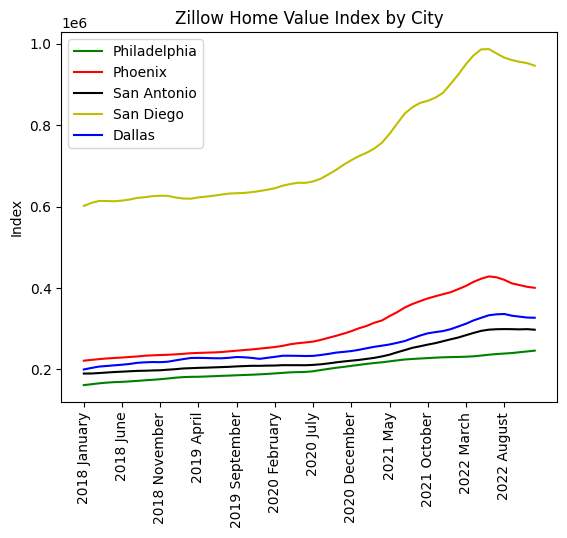

In [54]:
x = np.arange(0, len(dates))

plt.plot(dates, complete_df["Philadelphia"], 'g-', label = "Philadelphia")
plt.plot(dates, complete_df["Phoenix"], 'r-', label = "Phoenix")
plt.plot(dates, complete_df["San Antonio"], 'k-', label = "San Antonio")
plt.plot(dates, complete_df["San Diego"], 'y-', label = "San Diego")
plt.plot(dates, complete_df["Dallas"], 'b-', label = "Dallas")
plt.xticks(range(0, 60, 5), rotation = 90)
plt.title("Zillow Home Value Index by City")
plt.ylabel("Index")
plt.legend()
plt.savefig("output_data/ZHVIGraph.png")
plt.show()

60
